# Testing
### Daten der Bevölkerungsbefragung der Stadt Zürich 1999 bis 2021
Datum: 10.12.2021

**Importiere die notwendigen Packages**

In [3]:
#pip install geopandas altair fiona requests folium mplleaflet contextily seaborn datetime plotly datetime

In [74]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import datetime
import time
import geopandas as gpd
import folium 
import requests

In [75]:
import plotly.express as px


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [76]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_prd_stez_bevoelkerungsbefragung_seit1999_od4731

**Dataset auf PROD Datenkatalog**: https://data.stadt-zuerich.ch/dataset/prd_stez_bevoelkerungsbefragung_seit1999_od4731

In [77]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "integ";
print(status)

integ


In [84]:
# Filepath
if status == "prod":
    fp = r"//szh/ssz/applikationen/OGD_Dropzone/DWH/prd_stez_bevoelkerungsbefragungen_seit1999_OD4731/BEV473OD4731.csv"
    fp_meta = r"//szh/ssz/applikationen/OGD_Dropzone/DWH/prd_stez_bevoelkerungsbefragungen_seit1999_OD4731/codeliste_bvb_ogd.csv"

else:
    fp = r"//szh/ssz/applikationen/OGD_Dropzone/INT_DWH/prd_stez_bevoelkerungsbefragungen_seit1999_OD4731/BEV473OD4731.csv"
    fp_meta = r"//szh/ssz/applikationen/OGD_Dropzone/INT_DWH/prd_stez_bevoelkerungsbefragungen_seit1999_OD4731/codeliste_bvb_ogd.csv"

#download from INT-Datacatalog:
# \\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bfs_bevreg_todesursache_alter_geschlecht_seit1995_OD3110\BEV311OD3110.csv
print(fp)

//szh/ssz/applikationen/OGD_Dropzone/INT_DWH/prd_stez_bevoelkerungsbefragungen_seit1999_OD4731/BEV473OD4731.csv


In [85]:
# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
    parse_dates=['Jahr'], 
    date_parser=lambda x: datetime.datetime.strptime(x, '%Y'),
    encoding = "UTF-8",
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )



#### Parsing & Formatting Strings to Dataframes
- [**Cheat Sheet**](https://strftime.org/)
- Python documentation for **strptime**: [string **parse** time, Python 3](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime)
- Python documentation for strptime/**strftime**: [string **format** time,Python 3](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)



In [111]:
metadata2betested = pd.read_csv(
    fp_meta, 
    sep=',',
    encoding = "UTF-8",
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [112]:
type(data2betested)
metadata2betested

,Code,Beschreibung,Variable,Frage,Titel
0,1,Überhaupt nicht sinnvoll,A1027aa01,S10,Sinnhaftigkeit Bevölkerungsbefragung
1,2,Wenig sinnvoll,A1027aa01,S10,Sinnhaftigkeit Bevölkerungsbefragung
2,3,Sinnvoll,A1027aa01,S10,Sinnhaftigkeit Bevölkerungsbefragung
3,4,Sehr sinnvoll,A1027aa01,S10,Sinnhaftigkeit Bevölkerungsbefragung
4,99,Keine Angabe,A1027aa01,S10,Sinnhaftigkeit Bevölkerungsbefragung
...,...,...,...,...,...
4999,2,V2,fbversion,Fragebogenversion,Fragebogenversion
5000,99,Keine Angabe,fbversion,Fragebogenversion,Fragebogenversion
5001,1,Cati,methode,Methode,Methode
5002,2,Online,methode,Methode,Methode


 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [113]:
data2betested.head(3)

,Jahr,intnr,methode,fbversion,sgewicht,pgewicht,schichtCd,...,A9002aa01,A9003aa01,A9004aa01,A9005aa01,A9005ab01,A9005ac01,A1027aa01
0,1999-01-01,10114302,Cati,Keine Angabe,1,167,9999,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sehr sinnvoll
1,1999-01-01,10114293,Cati,Keine Angabe,1,152,9999,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sinnvoll
2,1999-01-01,10114277,Cati,Keine Angabe,1,114,9999,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sinnvoll


In [114]:
data2betested.dtypes

Jahr         datetime64[ns]
intnr                 int64
methode              object
fbversion            object
sgewicht            float64
                  ...      
A9004aa01            object
A9005aa01            object
A9005ab01            object
A9005ac01            object
A1027aa01            object
Length: 360, dtype: object

In [115]:
data2betested.shape

(33752, 360)

Beschreibe einzelne Attribute

In [116]:
data2betested.describe()

,intnr,sgewicht,pgewicht,schichtCd
count,33752,33752,33752,33752
mean,7577148,1,98,1405
std,4417919,0,37,3073
min,1101,0,2,11
25%,1113322,1,70,103
50%,10304966,1,97,203
75%,10710466,1,124,709
max,10919103,6,696,9999


Wie viele Nullwerte gibt es im Datensatz?

In [117]:
data2betested.isnull().sum()

Jahr         0
intnr        0
methode      0
fbversion    0
sgewicht     0
            ..
A9004aa01    0
A9005aa01    0
A9005ab01    0
A9005ac01    0
A1027aa01    0
Length: 360, dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

Bereite die Daten für die Grafik unten vor

In [118]:
Jahre = data2betested.groupby("Jahr")
len(Jahre)


11

In [119]:
for key, group in Jahre:
    print(key, len(group))

1999-01-01 00:00:00 2034
2001-01-01 00:00:00 2525
2003-01-01 00:00:00 2512
2005-01-01 00:00:00 2502
2007-01-01 00:00:00 2502
2009-01-01 00:00:00 2501
2011-01-01 00:00:00 2500
2013-01-01 00:00:00 2505
2015-01-01 00:00:00 3672
2019-01-01 00:00:00 5117
2021-01-01 00:00:00 5382


In [120]:
myJahr = "2011" 
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,Jahr,intnr,methode,fbversion,sgewicht,pgewicht,schichtCd,...,A9002aa01,A9003aa01,A9004aa01,A9005aa01,A9005ab01,A9005ac01,A1027aa01
14576,2011-01-01,10710167,Cati,Keine Angabe,1,142,21,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sehr sinnvoll
14577,2011-01-01,10710048,Cati,Keine Angabe,1,106,11,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Wenig sinnvoll
14578,2011-01-01,10710163,Cati,Keine Angabe,1,142,21,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Wenig sinnvoll
14579,2011-01-01,10710156,Cati,Keine Angabe,1,142,21,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sinnvoll
14580,2011-01-01,10710152,Cati,Keine Angabe,1,106,14,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sehr sinnvoll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17071,2011-01-01,10710298,Cati,Keine Angabe,1,115,23,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Wenig sinnvoll
17072,2011-01-01,10710311,Cati,Keine Angabe,1,107,24,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sinnvoll
17073,2011-01-01,10710332,Cati,Keine Angabe,1,116,31,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Sehr sinnvoll
17074,2011-01-01,10710385,Cati,Keine Angabe,1,127,32,...,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Wenig sinnvoll


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

Welche aggregierten Todesursachen gibt es überhaupt?

In [121]:
data2betested.dtypes

Jahr         datetime64[ns]
intnr                 int64
methode              object
fbversion            object
sgewicht            float64
                  ...      
A9004aa01            object
A9005aa01            object
A9005ab01            object
A9005ac01            object
A1027aa01            object
Length: 360, dtype: object

In [122]:
#data2betested

In [127]:
frage_A9004aa01 = data2betested.groupby(['Jahr', 'intnr', 'methode','fbversion'])[['sgewicht']].sum().sort_values('sgewicht', ascending=False)
frage_A9004aa01

sgewicht
Jahr       intnr    methode fbversion             
2015-01-01 10900363 Onli    Keine Angabe         6
           10900804 Onli    Keine Angabe         4
           10900023 Onli    Keine Angabe         4
           10901210 Papi    V1                   3
           10918210 Cati    Keine Angabe         3
...                                            ...
2021-01-01 1114799  Papi    Keine Angabe         0
           1113051  Onli    Keine Angabe         0
           1110647  Onli    Keine Angabe         0
           1111873  Onli    Keine Angabe         0
           1112176  Onli    Keine Angabe         0

[33752 rows x 1 columns]

In [124]:
metadata_agg_vars = metadata2betested.groupby(['Titel', 'Beschreibung'])[['Code']].count().sort_values('Code', ascending=False)

In [125]:
metadata_agg_vars
#metadata2betested

Code
Titel                                              Beschreibung                                        
Am wichtigsten bei Einkauf in Laden od. Geschäf... Ja                                                 1
Monatlicher Mietzins                               1674                                               1
                                                   1681                                               1
                                                   1680                                               1
                                                   168                                                1
...                                                                                                 ...
Grösste Probleme (siebte Nennung)                  Politik, Verwaltung                                1
                                                   Parkplatzprobleme                                  1
                                                   Lärm allgemein (ohne Verkehr-, Baustellenlärm)     1
                                                   Lebenskosten zu hoch                               1
Zufriedenheit öffentliche Verkehrsmittel           Weiss nicht                                        1

[5004 rows x 1 columns]

In [67]:
data2betested.dtypes

Kalenderjahr                     datetime64[ns]
KalJahr/Monat                           float64
Buchungskreis                             int64
Unnamed: 3                               object
Mitarbeiterkreis (PA)                     int64
Unnamed: 5                               object
Tarifgruppe                              object
Unnamed: 7                               object
Kaderstufe                               object
Unnamed: 9                               object
Kennzeichen Vollzeit/Teilzeit            object
Unnamed: 11                              object
Geschlecht                                int64
Unnamed: 13                              object
Lebensalter                               int64
Unnamed: 15                               int64
Beschäftigungsstatus                      int64
Unnamed: 17                              object
HC                                        int64
Anzahl Anstellungen                       int64
FTE                                     

----------------------------------------------------------

In [61]:
mySelYearsVor2006 = data2betested[(data2betested.StichtagDatJahr < "2006")]
mySelYearsVor2006.sort_values('AnzSterWir', ascending=False)

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
1517,1999-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,299,Frauen
1858,2000-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,289,Frauen
824,1997-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,270,Frauen
1165,1998-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,252,Frauen
483,1996-01-01,Ischämische Herzkrankheiten,531,11,85 und älter,248,Frauen
...,...,...,...,...,...,...,...
3277,2004-01-01,Perinatale Todesursachen,1000,11,85 und älter,0,Frauen
3276,2004-01-01,Perinatale Todesursachen,1000,10,80 – 84,0,Frauen
3275,2004-01-01,Perinatale Todesursachen,1000,9,75 – 79,0,Frauen
3274,2004-01-01,Perinatale Todesursachen,1000,8,70 – 74,0,Frauen


In [62]:
mySelYearsSeit2006 = data2betested[(data2betested.StichtagDatJahr > "2005")]
mySelYearsSeit2006.sort_values('AnzSterWir', ascending=False)

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
6115,2013-01-01,Demenz,400,11,85 und älter,269,Frauen
8018,2019-01-01,Demenz,400,11,85 und älter,235,Frauen
6742,2015-01-01,Demenz,400,11,85 und älter,231,Frauen
7710,2018-01-01,Demenz,400,11,85 und älter,230,Frauen
5807,2012-01-01,Demenz,400,11,85 und älter,223,Frauen
...,...,...,...,...,...,...,...
13201,2009-01-01,andere Unfälle,1152,2,1 – 14,0,Männer
13200,2009-01-01,andere Unfälle,1152,1,unter 1,0,Männer
6405,2014-01-01,Brustkrebs,214,4,30 – 44,0,Frauen
6413,2014-01-01,Chronische Bronchitis,643,1,unter 1,0,Frauen


In [38]:
mySelYears = data2betested[(data2betested.StichtagDatJahr == "2019") | (data2betested.StichtagDatJahr == "1996")]
mySelYears

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
341,1996-01-01,AIDS,102,1,unter 1,0,Frauen
342,1996-01-01,AIDS,102,2,1 – 14,0,Frauen
343,1996-01-01,AIDS,102,3,15 – 29,1,Frauen
344,1996-01-01,AIDS,102,4,30 – 44,15,Frauen
345,1996-01-01,AIDS,102,5,45 – 59,0,Frauen
...,...,...,...,...,...,...,...
16440,2019-01-01,übrige Kreislaufkrankheiten,539,7,65 – 69,1,Männer
16441,2019-01-01,übrige Kreislaufkrankheiten,539,8,70 – 74,6,Männer
16442,2019-01-01,übrige Kreislaufkrankheiten,539,9,75 – 79,2,Männer
16443,2019-01-01,übrige Kreislaufkrankheiten,539,10,80 – 84,5,Männer


In [39]:
todesursachen= mySelYears.groupby(['TodesursacheSort','Todesursache'])[['AnzSterWir']].sum().sort_values('AnzSterWir', ascending=False)
todesursachen

,,AnzSterWir
TodesursacheSort,Todesursache,
531,Ischämische Herzkrankheiten,1083
219,andere Krebskrankheiten,907
532,übrige Herzkrankheiten,864
1200,Übrige,722
400,Demenz,599
533,Hirngefässkrankheiten,495
1300,Unbekannt,310
213,Lungenkrebs,286
1152,andere Unfälle,241


### Daten in interaktiver Treemap zeigen
Dazu gibt es eine sehr nützliche Webseite https://plotly.com/python/treemaps/
Zu Farbskalen, siehe: https://plotly.com/python/builtin-colorscales/

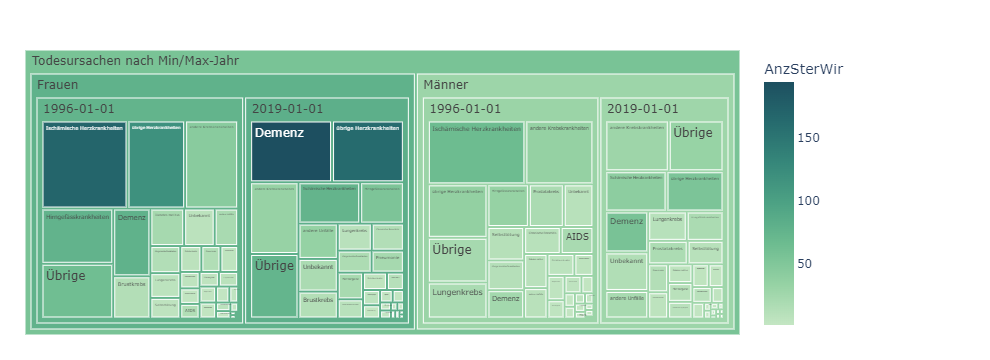

In [40]:
df = mySelYears
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Min/Max-Jahr"), 'Geschlecht','StichtagDatJahr','Todesursache'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blugrn')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


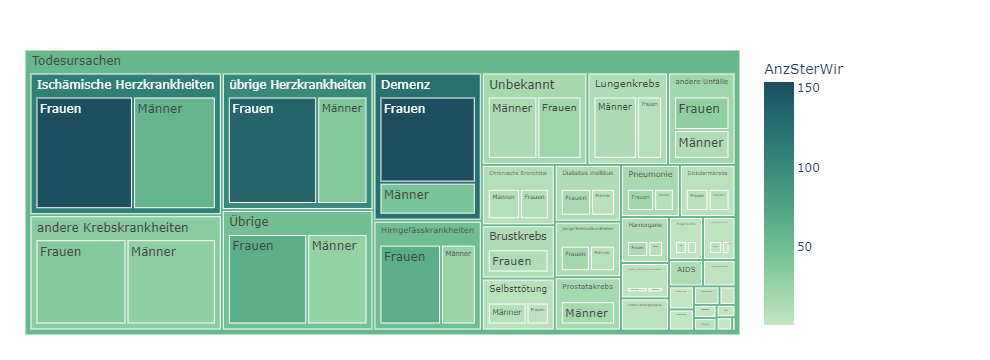

In [41]:
df = data2betested
fig = px.treemap(df, path=[px.Constant("Todesursachen"), 'Todesursache', 'Geschlecht'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blugrn')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()



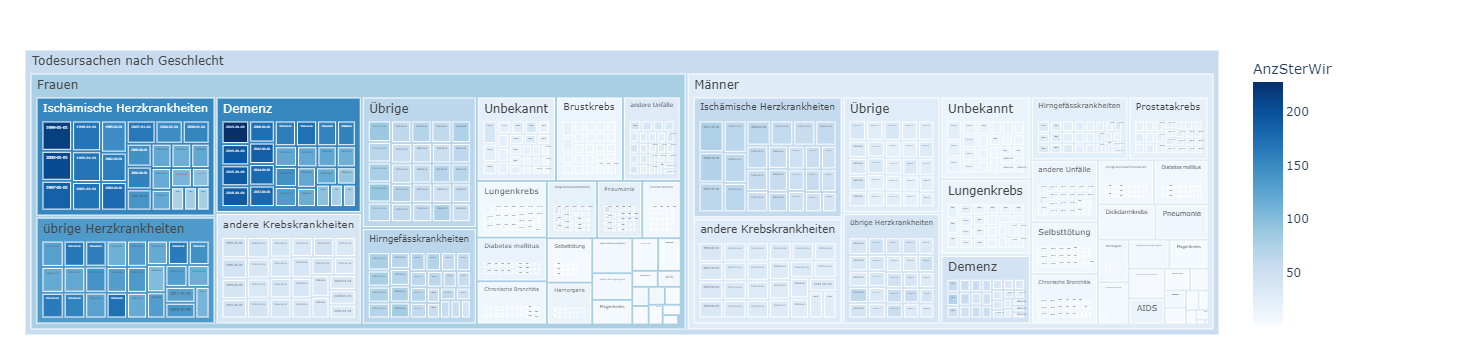

In [42]:
df = data2betested
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Geschlecht"), 'Geschlecht', 'Todesursache', 'StichtagDatJahr'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


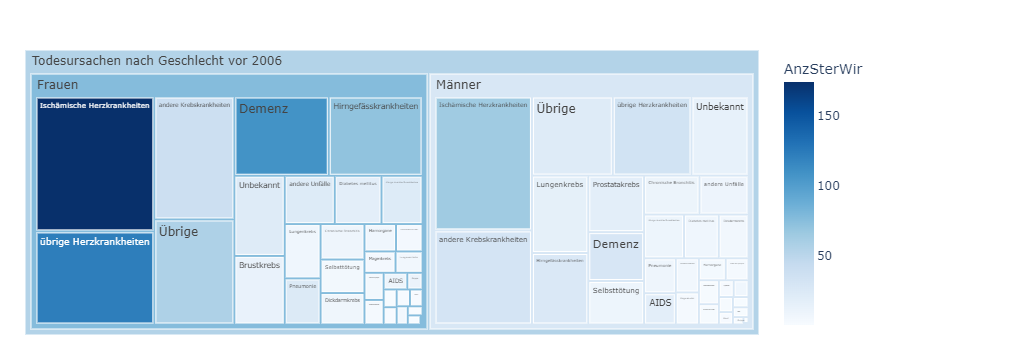

In [66]:
df = mySelYearsVor2006
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Geschlecht vor 2006"), 'Geschlecht', 'Todesursache'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()


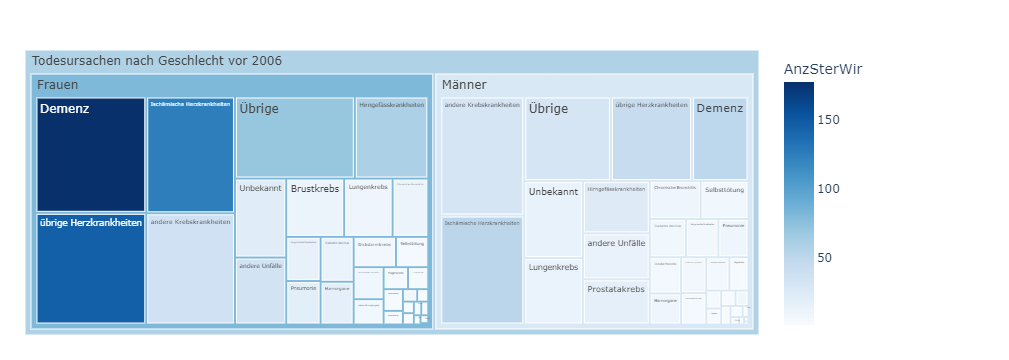

In [67]:
df = mySelYearsSeit2006
fig = px.treemap(df, path=[px.Constant("Todesursachen nach Geschlecht vor 2006"), 'Geschlecht', 'Todesursache'], values='AnzSterWir',
                color='AnzSterWir', hover_data=['Todesursache'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()

### Einfache Visualisierungen zur Plausi

Exploriere die Daten mit Pivottable.JS

In [43]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [44]:
mySelYears = data2betested[(data2betested.StichtagDatJahr == "2019")]


In [45]:
#myGraph= mySelYears[['TodesursacheSpezSort','TodesursacheSpezLang', 'AlterVSort_Nam', 'AnzSterWir']]
myGraph= mySelYears.groupby(['TodesursacheSort','Todesursache', 'AlterVSort_Nam'])['AnzSterWir'].sum()
myGraph

TodesursacheSort  Todesursache  AlterVSort_Nam
102               AIDS          1 – 14             0
                                15 – 29            0
                                30 – 44            0
                                45 – 59            1
                                60 – 64            0
                                                  ..
1300              Unbekannt     70 – 74           18
                                75 – 79           27
                                80 – 84           16
                                85 und älter      53
                                unter 1            0
Name: AnzSterWir, Length: 352, dtype: int64

In [48]:
myGraph.dtypes
murders = data2betested[(data2betested.Todesursache == "AIDS")]
murders

,StichtagDatJahr,Todesursache,TodesursacheSort,AlterVSort_Num,AlterVSort_Nam,AnzSterWir,Geschlecht
0,1995-01-01,AIDS,102,1,unter 1,0,Frauen
1,1995-01-01,AIDS,102,2,1 – 14,0,Frauen
2,1995-01-01,AIDS,102,3,15 – 29,2,Frauen
3,1995-01-01,AIDS,102,4,30 – 44,20,Frauen
4,1995-01-01,AIDS,102,5,45 – 59,2,Frauen
...,...,...,...,...,...,...,...
16110,2019-01-01,AIDS,102,7,65 – 69,0,Männer
16111,2019-01-01,AIDS,102,8,70 – 74,0,Männer
16112,2019-01-01,AIDS,102,9,75 – 79,0,Männer
16113,2019-01-01,AIDS,102,10,80 – 84,0,Männer


In [49]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]] 


highlight = alt.selection(type='single', on='mouseover',
                          fields=['StichtagDatJahr'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(murders).encode(
    x='StichtagDatJahr',
    y='AnzSterWir',
    color='Todesursache'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=700 , height=500
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines


alt.LayerChart(...)

In [50]:
alt.Chart(mySelYears).mark_circle(size=60).encode(
    x='AlterVSort_Nam',
    y='AnzSterWir',
    color='Todesursache',
    tooltip=['AlterVSort_Nam','AnzSterWir']
).interactive() # this makes the axes interactive: now you can zoom & pan


alt.Chart(...)

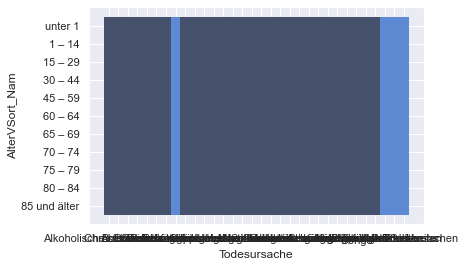

In [51]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelYears, x="Todesursache", y="AlterVSort_Nam") #, y="Nachname")
plt.show();